# EXPLORATORY DATA ANALYSIS OF ROCKET RETAIL DATASET

This notebook serves as a foundational step in understanding the Retail Rocket ecommerce dataset, which forms the basis for the customer segmentation methodology developed in this research. The dataset captures real-world user interactions on an online retail platform and holds rich behavioural signals that, when explored thoughtfully, can reveal underlying patterns in customer journeys.

The analysis presented here will aim to go beyond surface-level statistics, focusing instead on uncovering the structure and integrity of the dataset, evaluating its completeness, and preparing the ground for more advanced behavioural modelling. This process will involve inspecting missing values, analysing event types and user activity levels, and understanding the variability of item properties and category hierarchies over time.

The outputs of this notebook—both in terms of data insights and visual artefacts—will be saved and later incorporated into an interactive Streamlit dashboard, making the data exploration reproducible, transparent, and accessible to wider stakeholders.

## Importing Essential Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

## Dataset Loading

In this part, we will load the Retail Rocket dataset directly from Kaggle into our Colab environment. We’ll use the Kaggle API, which requires authentication via an API key.
This allows us to work with the full dataset without uploading it manually, streamlining the workflow.

In [2]:
# Setting your Kaggle credentials directly in environment variables
os.environ['KAGGLE_USERNAME'] = 'priyanshugarg291998'
os.environ['KAGGLE_KEY'] = 'f0556f4daba04f242742ca7dccc2928c'

In [3]:
#listing the files in the rocket retail dataset
!kaggle datasets list -s retailrocket/ecommerce-dataset

# Downloading and extracting the Retail Rocket dataset into /content
!kaggle datasets download -d retailrocket/ecommerce-dataset -p /content --unzip

ref                             title                                          size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------  ---------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
retailrocket/ecommerce-dataset  Retailrocket recommender system dataset   304719974  2022-11-08 16:03:10.607000          39313        566  0.88235295       
Dataset URL: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset
License(s): CC-BY-NC-SA-4.0
 94% 273M/291M [00:01<00:00, 178MB/s]
100% 291M/291M [00:01<00:00, 219MB/s]


In [4]:
#Loading the dataset to dataframes
df_events = pd.read_csv('/content/events.csv')
df_item_properties_1 = pd.read_csv('/content/item_properties_part1.csv')
df_item_properties_2 = pd.read_csv('/content/item_properties_part2.csv')
df_category_tree = pd.read_csv('/content/category_tree.csv')

#printing each dataframe shape
print("Shape of df_events:", df_events.shape)
print("Shape of df_item_properties_1:", df_item_properties_1.shape)
print("Shape of df_item_properties_2:", df_item_properties_2.shape)
print("Shape of df_category_tree:", df_category_tree.shape)

print(f"\nfew rows of df_events:\n {df_events.head()}")
print(f"few rows of df_item_properties_1:\n {df_item_properties_1.head()}")
print(f"few rows of df_item_properties_2:\n {df_item_properties_2.head()}")
print(f"few rows of df_category_tree:\n {df_category_tree.head()}")

Shape of df_events: (2756101, 5)
Shape of df_item_properties_1: (10999999, 4)
Shape of df_item_properties_2: (9275903, 4)
Shape of df_category_tree: (1669, 2)

few rows of df_events:
        timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
few rows of df_item_properties_1:
        timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
few rows of df_item

In [5]:
# Merging item_properties_part1 and item_properties_part2 into a single dataframe
df_item_properties = pd.concat([df_item_properties_1, df_item_properties_2], ignore_index=True)

# Verifying the shape of the merged dataframe
print("Shape of df_item_properties (after merge):", df_item_properties.shape)

Shape of df_item_properties (after merge): (20275902, 4)


Shape of df_item_properties (20275902, 4) = (Shape of df_item_properties_1(10999999, 4)) + (Shape of df_item_properties_2 (9275903, 4))

Implicating that both dataframes, df_item_properties_1 and df_item_properties_2 have merged properly yielding df_item_properties.

In [6]:
#Printing few rows of df_item_properties
print(f"few rows of df_item_properties:\n {df_item_properties.head()}")

# Deleting item_properties_1 and 2 to save memory

del df_item_properties_1
del df_item_properties_2

few rows of df_item_properties:
        timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513


In this section, we authenticated the Kaggle API and successfully downloaded the complete Retail Rocket ecommerce dataset into the Colab environment. The dataset comprises four files—events.csv, item_properties_part1.csv, item_properties_part2.csv, and category_tree.csv. Each file was loaded into a dedicated DataFrame, and their shapes were validated to ensure completeness.

Since the item_properties data was split into two parts for distribution purposes, we merged item_properties_part1 and item_properties_part2 into a single unified DataFrame, df_item_properties, using row-wise concatenation. The merged shape matched the expected sum of the two original parts, confirming that the operation preserved all records. The original partial DataFrames were then removed from memory to optimise performance and manage resources efficiently.

This step ensures that all future analysis works from a consistent and complete foundation across behavioural events, item attributes, and category hierarchies.

## Dataset Structure and Basic Overview

This section provides a structured summary of each DataFrame. The focus is to:

- Understand the columns present in each dataset.

- Confirm data types and non-null counts.

- Check for any unexpected column names or data type mismatches.

These initial observations will help us anticipate what cleaning or transformations may be required in the next steps.

### Dataset Info Summary

In [7]:
# Summarising the structure of each dataframe to understand column names, data types and completeness

print("Summary of df_events:")
df_events.info()
print("\nSummary of df_item_properties:")
df_item_properties.info()
print("\nSummary of df_category_tree:")
df_category_tree.info()

Summary of df_events:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB

Summary of df_item_properties:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275902 entries, 0 to 20275901
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 618.8+ MB

Summary of df_category_tree:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parent

Each dataset was loaded successfully and its structure was examined to understand the available columns, data types, and potential missing values.
The df_events DataFrame contains user interaction logs including timestamps, visitor IDs, event types (view, addtocart, transaction), and associated item and transaction identifiers. The transactionid column has missing values in non-transaction events, which is expected.

The merged df_item_properties DataFrame includes item-level metadata snapshots, capturing how item attributes (such as categoryid and available) change over time. Both property and value columns are object types, as these fields often contain hashed or categorical information.

The df_category_tree DataFrame represents the hierarchy of product categories. The parentid field contains missing values for root categories, which will be handled during category tree exploration.

All datasets appear structurally complete, and no column-level data type inconsistencies were identified at this stage. This confirms that the data is ready for further inspection and cleaning.

### Missing Values Analysis

The goal here is to:

- Calculate the total number of missing values in each dataset.

- Summarise how many missing values exist in each column.

- Validate whether these missing values are expected (e.g., transactionid in non-purchase events, parentid in root categories) or need attention.

This step will help determine whether additional data cleaning is needed before analysis.

In [8]:
# Function to print total and column-wise missing values in a DataFrame

def print_missing_values_summary(dataframe, dataframe_name):
    total_missing = dataframe.isnull().sum().sum()
    missing_per_column = dataframe.isnull().sum()

    print(f"Missing value summary for {dataframe_name}:")
    print(f"Total records in {dataframe_name}: {dataframe.shape[0]}")
    print(f"Total missing values in {dataframe_name}: {total_missing}\n")

    if total_missing == 0:
        print("No missing values found in any column.\n")
    else:
        print("Missing values by column:")
        print(missing_per_column[missing_per_column > 0])
        print("-" * 30)

# Running for each dataset
print_missing_values_summary(df_events, 'df_events')
print_missing_values_summary(df_item_properties, 'df_item_properties')
print_missing_values_summary(df_category_tree, 'df_category_tree')


Missing value summary for df_events:
Total records in df_events: 2756101
Total missing values in df_events: 2733644

Missing values by column:
transactionid    2733644
dtype: int64
------------------------------
Missing value summary for df_item_properties:
Total records in df_item_properties: 20275902
Total missing values in df_item_properties: 0

No missing values found in any column.

Missing value summary for df_category_tree:
Total records in df_category_tree: 1669
Total missing values in df_category_tree: 25

Missing values by column:
parentid    25
dtype: int64
------------------------------


The missing values analysis confirms that the datasets are generally complete, with missing entries only in columns where they are expected.

In df_events, the transactionid column has 2,733,644 missing values. This is consistent with the dataset structure, as only transaction event types are associated with a transaction ID. All other events (view and addtocart) legitimately lack a transactionid.

The merged df_item_properties dataset contains no missing values, confirming its integrity across all rows and columns.

In the df_category_tree, the parentid column has 25 missing values. These correspond to root categories in the hierarchy and represent a normal structure where some categories do not have a parent.

No further imputation or removal of missing values is required at this stage, as these gaps reflect the natural structure of the data.

## Event Type Distribution

#### Event Type Counts

In [9]:
# Summarising event type distribution to understand user interaction behaviour

# Count of each event type
event_type_counts = df_events['event'].value_counts().reset_index()
event_type_counts.columns = ['event_type', 'count']

# Display the summary table
print("Event type distribution:")
print(event_type_counts)

# Defining folder where output files will be saved
results_folder_path = '/content/results'
os.makedirs(results_folder_path, exist_ok=True)

# Function to save the current matplotlib plot to the results folder
def save_plot(plot_filename):
    file_path = os.path.join(results_folder_path, plot_filename)
    import matplotlib.pyplot as plt
    plt.savefig(file_path, bbox_inches='tight')
    print(f"Plot saved as {file_path}")

# Function to save a DataFrame summary to the results folder as a CSV
def save_summary(dataframe, summary_filename):
    file_path = os.path.join(results_folder_path, summary_filename)
    dataframe.to_csv(file_path, index=False)
    print(f"Summary saved as {file_path}")

# Saving the event type counts summary as a CSV
save_summary(event_type_counts, 'event_type_counts.csv')

Event type distribution:
    event_type    count
0         view  2664312
1    addtocart    69332
2  transaction    22457
Summary saved as /content/results/event_type_counts.csv


#### Event Type Distribution Plot

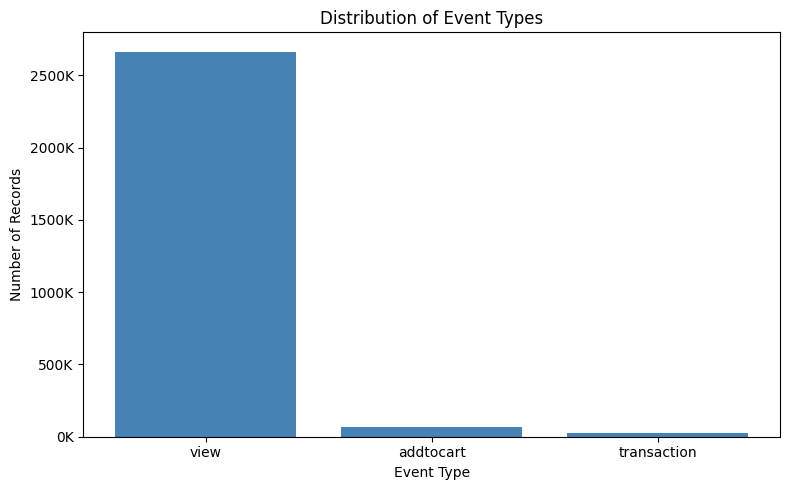

Plot saved as /content/results/event_type_distribution.png


<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(event_type_counts['event_type'], event_type_counts['count'], color='steelblue')
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)

# Formating y-axis to thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()

# Saving the event type distribution plot
save_plot('event_type_distribution.png')

The event type distribution shows a highly imbalanced dataset, with the vast majority of events classified as view. Specifically, there are approximately 2.66 million view events, compared to 69,000 add-to-cart events and 22,000 transactions. This imbalance reflects the natural behaviour in online retail, where most customer interactions do not result in immediate purchases.

To improve the interpretability of the distribution plot for non-technical stakeholders, the y-axis was reformatted to display counts in thousands (K), and the plot clearly shows the relative differences in event volumes across categories. This observation highlights the need for downstream models to account for event imbalance, especially when predicting conversions or segmenting based on interaction types.

The dataset shows a natural skew towards viewing events, which reflects common ecommerce browsing behaviour. Rather than using raw event counts as static features, since our model will rely transformed latent sequence patterns, our clustering models should likely yield more meaningful clusters as it accounts for this biasness in ecommerce browsing behaviour.

### Events per Visitor Summary

In [11]:
# Summarising the number of events each visitor performed

# Count number of events per visitor
visitor_event_counts = df_events['visitorid'].value_counts().reset_index()
visitor_event_counts.columns = ['visitorid', 'event_count']

# Display the top visitors by activity
print("Top 10 most active visitors:")
print(visitor_event_counts.head(10))

# Saving the output as a CSV
save_summary(visitor_event_counts, 'visitor_event_counts.csv')

Top 10 most active visitors:
   visitorid  event_count
0    1150086         7757
1     530559         4328
2     152963         3024
3     895999         2474
4     163561         2410
5     371606         2345
6     286616         2252
7     684514         2246
8     892013         2024
9     861299         1991
Summary saved as /content/results/visitor_event_counts.csv


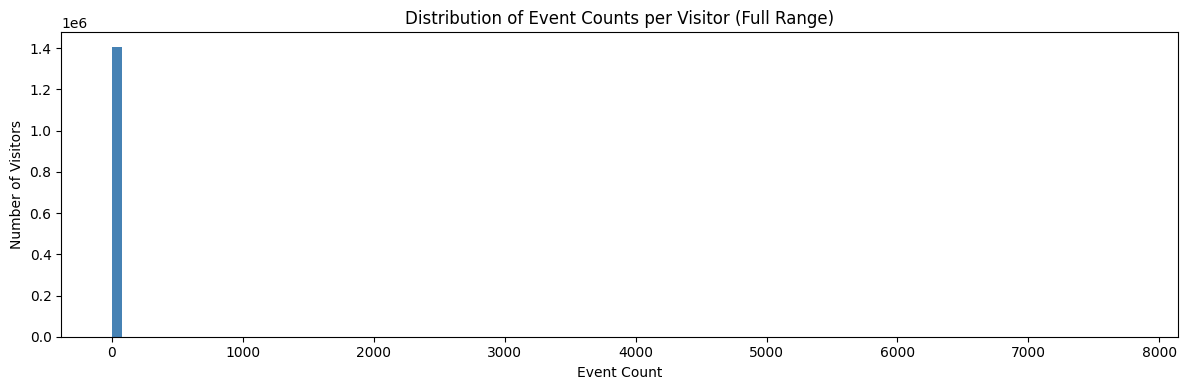

Plot saved as /content/results/visitor_event_distribution_full.png


<Figure size 640x480 with 0 Axes>

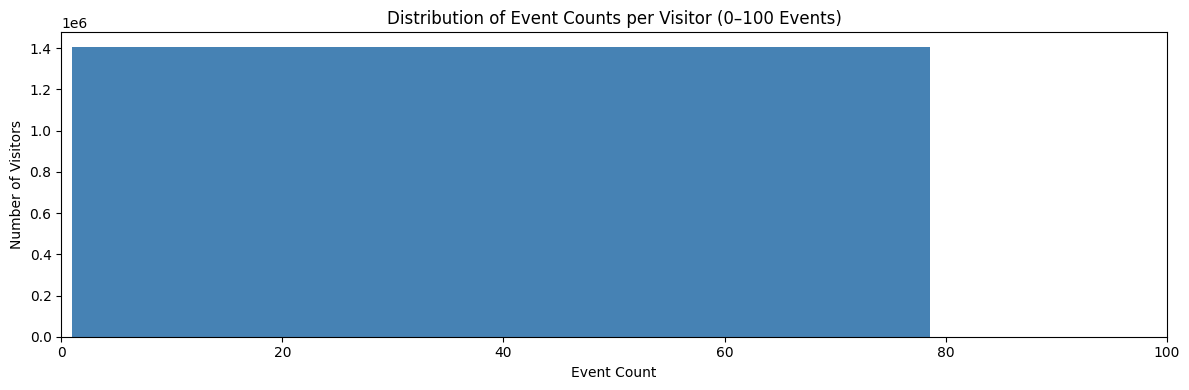

Plot saved as /content/results/visitor_event_distribution_zoomed.png


<Figure size 640x480 with 0 Axes>

In [12]:
# Plot 1: Full visitor event count distribution
plt.figure(figsize=(12, 4))
plt.hist(visitor_event_counts['event_count'], bins=100, color='steelblue')
plt.title("Distribution of Event Counts per Visitor (Full Range)")
plt.xlabel("Event Count")
plt.ylabel("Number of Visitors")
plt.tight_layout()
plt.show()

save_plot('visitor_event_distribution_full.png')

# Plot 2: Zoomed in (up to 100 events)
plt.figure(figsize=(12, 4))
plt.hist(visitor_event_counts['event_count'], bins=100, color='steelblue')
plt.xlim(0, 100)
plt.title("Distribution of Event Counts per Visitor (0–100 Events)")
plt.xlabel("Event Count")
plt.ylabel("Number of Visitors")
plt.tight_layout()
plt.show()

save_plot('visitor_event_distribution_zoomed.png')


The analysis of event counts per visitor highlights a highly skewed user activity pattern. While a small group of visitors exhibits extremely high engagement—with some generating thousands of events—the vast majority of users interact only a few times with the platform. This observation aligns with typical ecommerce traffic patterns, where casual browsers significantly outnumber highly engaged customers.

Two visualisations were created to better represent this skew. The full-range histogram shows the overall distribution of user activity, while the zoomed-in version focuses on visitors with fewer than 100 events, offering a clearer view of the common usage patterns.

This understanding will influence session construction and embedding design, ensuring that both high-activity and low-activity users are meaningfully represented in the behavioural segmentation process.

### Time Gap Analysis Between Events

In this step, we will:

- Calculate the time difference between consecutive events for each visitor.

- Convert these differences into seconds.

- Analyse the distribution of time gaps to help determine a sensible session timeout threshold (e.g., 30 minutes or 1 hour).

Visualise the results to understand how frequently users return within the same session.

In [14]:
# Sorting events by visitor and timestamp to calculate time gaps correctly
df_events_sorted = df_events.sort_values(['visitorid', 'timestamp']).copy()

# Calculating time difference between consecutive events per visitor
df_events_sorted['time_diff'] = df_events_sorted.groupby('visitorid')['timestamp'].diff()

# Removing NaN time differences (which occur for the first event of each visitor)
df_events_sorted = df_events_sorted.dropna(subset=['time_diff'])

# Converting time differences from milliseconds to seconds
df_events_sorted['time_diff_sec'] = df_events_sorted['time_diff'] / 1000

# Taking the log scale for better visualisation (many small gaps, some very large)
df_events_sorted['log_time_gap'] = np.log1p(df_events_sorted['time_diff_sec'])

# Saving the dataframe
save_summary(df_events_sorted, 'df_events_sorted.csv')

/tmp/ipython-input-14-4220816253.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events_sorted['log_time_gap'] = np.log1p(df_events_sorted['time_diff_sec'])


Summary saved as /content/results/df_events_sorted.csv


### Visualising the Time Gap Distribution

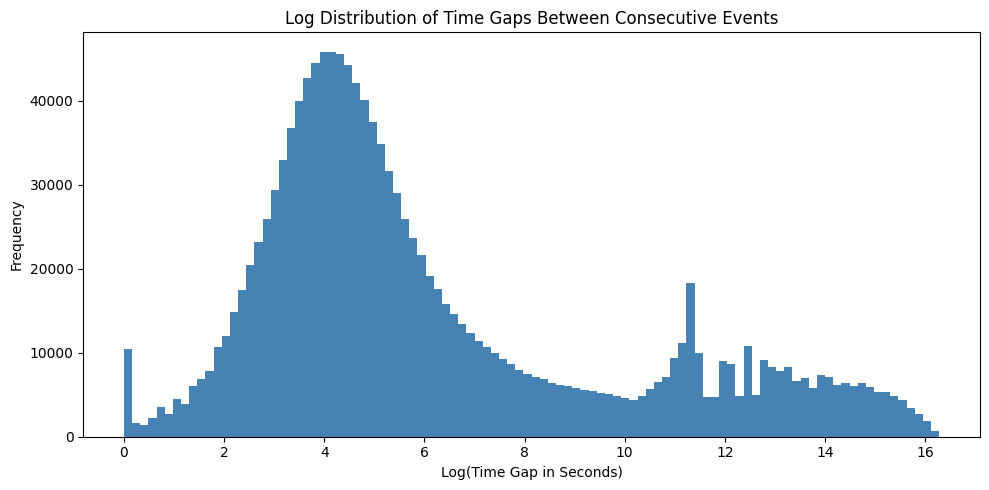

Plot saved as /content/results/time_gap_distribution_log.png


<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(df_events_sorted['log_time_gap'], bins=100, color='steelblue')
plt.title("Log Distribution of Time Gaps Between Consecutive Events")
plt.xlabel("Log(Time Gap in Seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Saving the plot for dashboard
save_plot('time_gap_distribution_log.png')


To support session-based behavioural modelling, we analysed the distribution of time gaps between consecutive user events. The dataset was first sorted by visitor and timestamp, and the difference between each successive event was calculated in seconds.

A log transformation was applied to the time gaps to improve interpretability, given the wide range of values. The resulting distribution shows that the majority of time gaps fall within a moderate range, indicating sustained user engagement within relatively short bursts of activity. However, the presence of a long right tail and several smaller peaks suggests periodic returns or prolonged inactivity between sessions.

This behaviour aligns with the browsing patterns typical in ecommerce, where users may revisit the platform intermittently. These observations will guide the choice of a session timeout threshold — likely in the range of 30 minutes to 1 hour — which will be applied when constructing behaviour sessions for neural embeddings.

### Computing Quantiles of Raw Time Gaps

In [16]:
# Calculating descriptive statistics for the raw time gaps
gap_statistics = df_events_sorted['time_diff_sec'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

# Display summary statistics
print("Summary statistics of time gaps (seconds):")
print(gap_statistics)

Summary statistics of time gaps (seconds):
count    1.348521e+06
mean     2.142310e+05
std      9.039612e+05
min      0.000000e+00
25%      3.823300e+01
50%      1.364080e+02
75%      2.449789e+03
90%      2.635238e+05
95%      1.190249e+06
99%      5.160078e+06
max      1.178745e+07
Name: time_diff_sec, dtype: float64


Based on the time gap analysis, 75% of user actions occur within a time gap of ~40 minutes. To segment user behaviour into meaningful sessions, a timeout threshold of 30 minutes (1,800 seconds) will be applied. This threshold captures the majority of within-session activity while separating distinct visits.

This approach balances the natural breakpoints in user behaviour observed in the data and aligns with common practices in session-based modelling.

### Session Construction Function

In [19]:
# Function to assign session IDs based on time gaps
def assign_sessions(dataframe, time_gap_threshold_seconds=1800):
    dataframe = dataframe.sort_values(['visitorid', 'timestamp']).copy()

    # Calculate time difference between consecutive events
    dataframe['time_diff_sec'] = dataframe.groupby('visitorid')['timestamp'].diff().fillna(0) / 1000

    # Start new session if time gap > threshold
    dataframe['new_session'] = dataframe['time_diff_sec'] > time_gap_threshold_seconds

    # Assign session IDs using cumulative sum
    dataframe['session_id'] = dataframe.groupby('visitorid')['new_session'].cumsum()

    # Create unique session ID combining visitor and session number
    dataframe['session_id'] = dataframe['visitorid'].astype(str) + "_" + dataframe['session_id'].astype(str)

    return dataframe

# Applying the session construction
df_sessions = assign_sessions(df_events, time_gap_threshold_seconds=1800)

# Checking the first few rows
print("Sample rows with session IDs assigned:")
print(df_sessions[['visitorid', 'timestamp', 'event', 'session_id']].head(10))

# Saving Sessions
save_summary(df_sessions, 'df_sessions.csv')

Sample rows with session IDs assigned:
         visitorid      timestamp event session_id
1361687          0  1442004589439  view        0_0
1367212          0  1442004759591  view        0_0
1367342          0  1442004917175  view        0_0
830385           1  1439487966444  view        1_0
742616           2  1438969904567  view        2_0
735273           2  1438970013790  view        2_0
737711           2  1438970212664  view        2_0
726292           2  1438970468920  view        2_0
737615           2  1438970905669  view        2_0
735202           2  1438971444375  view        2_0
Summary saved as /content/results/df_sessions.csv


## Session Construction

In [21]:
# Defining session timeout threshold (30 minutes in seconds)
session_timeout_sec = 1800

# Sorting events again for safety
df_events_sorted = df_events.sort_values(['visitorid', 'timestamp']).copy()

# Calculating time difference between events per visitor
df_events_sorted['time_diff'] = df_events_sorted.groupby('visitorid')['timestamp'].diff() / 1000  # converting to seconds

# Identifying where a new session should begin
df_events_sorted['new_session'] = (df_events_sorted['time_diff'] > session_timeout_sec) | (df_events_sorted['time_diff'].isnull())

# Cumulative session ID per visitor
df_events_sorted['session_id'] = df_events_sorted.groupby('visitorid')['new_session'].cumsum()

# Optional: create a global unique session ID
df_events_sorted['session_global_id'] = df_events_sorted['visitorid'].astype(str) + '_' + df_events_sorted['session_id'].astype(str)

# Verifying the output
print("Sample sessionised events:")
print(df_events_sorted[['visitorid', 'timestamp', 'event', 'session_id', 'session_global_id']].head(10))

Sample sessionised events:
         visitorid      timestamp event  session_id session_global_id
1361687          0  1442004589439  view           1               0_1
1367212          0  1442004759591  view           1               0_1
1367342          0  1442004917175  view           1               0_1
830385           1  1439487966444  view           1               1_1
742616           2  1438969904567  view           1               2_1
735273           2  1438970013790  view           1               2_1
737711           2  1438970212664  view           1               2_1
726292           2  1438970468920  view           1               2_1
737615           2  1438970905669  view           1               2_1
735202           2  1438971444375  view           1               2_1


To convert raw event logs into structured behaviour sessions, we applied a session timeout threshold of 30 minutes. Events were sorted by visitor and timestamp, and time gaps between consecutive actions were calculated. A new session was initiated whenever a user was inactive for more than 1,800 seconds or when the first event for a visitor occurred.

Each session was assigned a unique session_id per visitor, and a global session identifier (session_global_id) was created for easier analysis and embedding preparation. This session structure will form the foundation for downstream modelling, where the goal is to capture meaningful behavioural sequences rather than isolated events.

## Sessions per Visitor Analysis

### Sessions per Visitor Summary

In [23]:
# Counting how many sessions each visitor has
sessions_per_visitor = df_events_sorted.groupby('visitorid')['session_id'].nunique().reset_index()
sessions_per_visitor.columns = ['visitorid', 'session_count']

# Displaying visitors with the most sessions
print("Top 10 visitors with the most sessions:")
print(sessions_per_visitor.sort_values(by='session_count', ascending=False).head(10))


Top 10 visitors with the most sessions:
         visitorid  session_count
316850      316850            462
825321      825321            417
895999      895999            414
638482      638482            353
518659      518659            302
1126569    1126569            282
229157      229157            279
530559      530559            269
85734        85734            267
1165148    1165148            264


### Plotting Sessions per Visitor Distribution

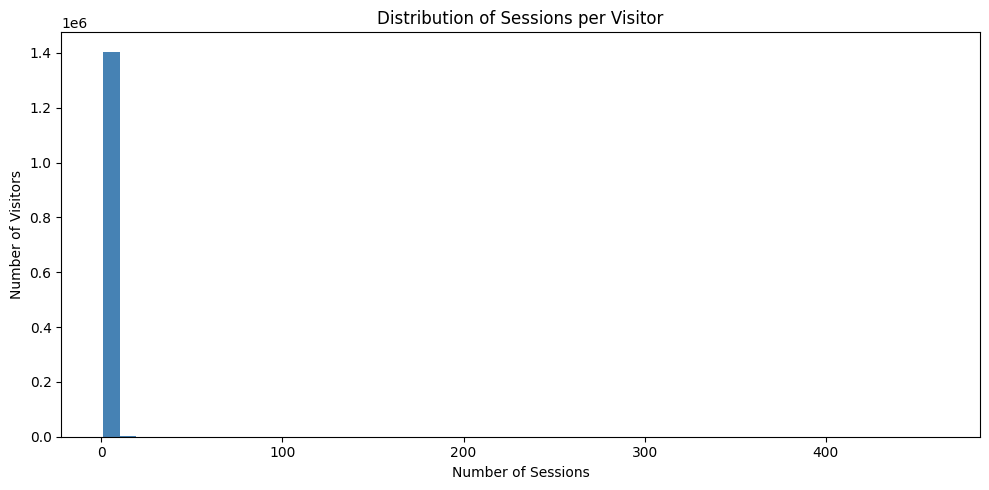

Plot saved as /content/results/sessions_per_visitor_distribution.png


<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(sessions_per_visitor['session_count'], bins=50, color='steelblue')
plt.title("Distribution of Sessions per Visitor")
plt.xlabel("Number of Sessions")
plt.ylabel("Number of Visitors")
plt.tight_layout()
plt.show()

save_plot('sessions_per_visitor_distribution.png')

The distribution of sessions per visitor highlights a highly imbalanced engagement pattern. Most visitors have only a single session, reflecting typical ecommerce browsing behaviour. However, a small number of users have an exceptionally high number of sessions, with the most active visitor initiating over 460 sessions.

This observation aligns with the earlier user activity distribution, reinforcing the pattern that only a small subset of visitors return to the platform frequently. These session counts will inform downstream analysis, particularly when distinguishing between casual browsers and consistently engaged users.

## Events per Session

### Session Length Summary

In [29]:
# Counting how many events each session contains
events_per_session = df_events_sorted.groupby('session_global_id').size().reset_index(name='event_count')

# Display the top sessions by activity
print("Top 10 sessions with the most events:")
print(events_per_session.sort_values(by='event_count', ascending=False).head(10))

#Saving to csv
save_summary(events_per_session, 'events_per_session.csv')

Top 10 sessions with the most events:
        session_global_id  event_count
802867           310759_9          417
434817         1313381_27          330
1092989          519839_2          320
1107053          530033_1          310
1477736         79627_192          275
1225897          615132_9          248
887771           371606_3          244
769351          286616_15          243
1477708         79627_167          237
1434581         765630_14          237
Summary saved as /content/results/events_per_session.csv


### Session Length Distribution Plot

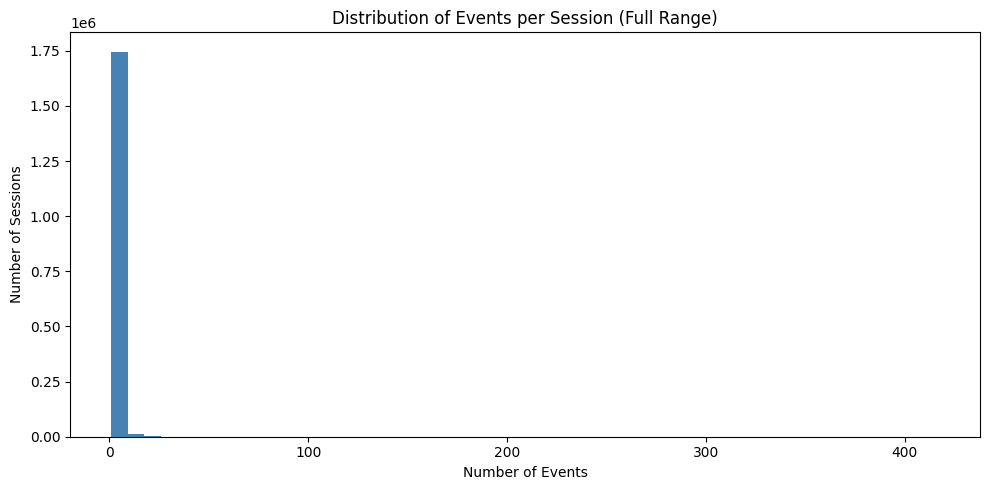

Plot saved as /content/results/events_per_session_distribution_full.png


<Figure size 640x480 with 0 Axes>

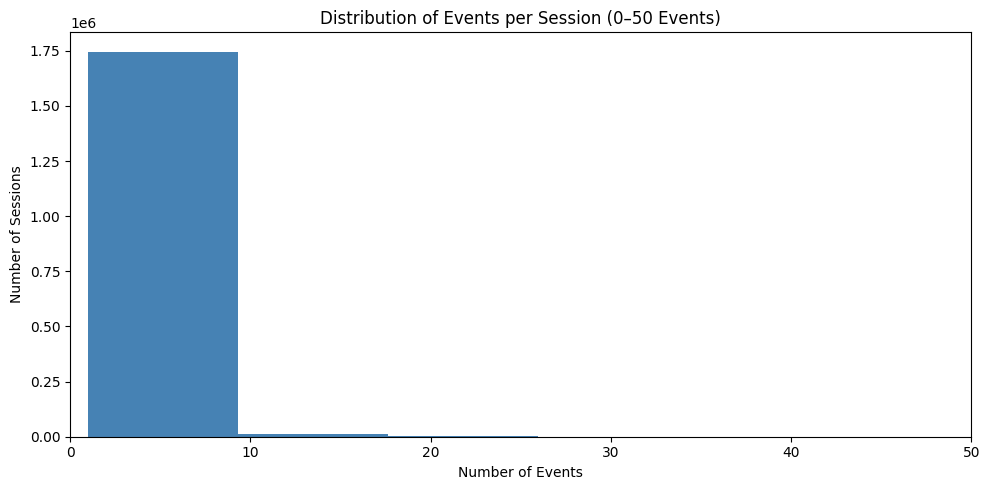

Plot saved as /content/results/events_per_session_distribution_zoomed.png


<Figure size 640x480 with 0 Axes>

In [30]:
# Full distribution (keep for reference)
plt.figure(figsize=(10, 5))
plt.hist(events_per_session['event_count'], bins=50, color='steelblue')
plt.title("Distribution of Events per Session (Full Range)")
plt.xlabel("Number of Events")
plt.ylabel("Number of Sessions")
plt.tight_layout()
plt.show()

save_plot('events_per_session_distribution_full.png')

# Zoomed in: sessions with up to 50 events
plt.figure(figsize=(10, 5))
plt.hist(events_per_session['event_count'], bins=50, color='steelblue')
plt.xlim(0, 50)
plt.title("Distribution of Events per Session (0–50 Events)")
plt.xlabel("Number of Events")
plt.ylabel("Number of Sessions")
plt.tight_layout()
plt.show()

save_plot('events_per_session_distribution_zoomed.png')


The distribution of events per session highlights a sharp imbalance. The vast majority of sessions are short, consisting of only a few events. A small subset of sessions, however, demonstrate highly active engagement, with some containing over 400 user actions within a single session.

This distribution reflects common user behaviour in ecommerce, where most browsing sessions are brief and exploratory, while a few involve deeper engagement, potentially reflecting purchase consideration or automated activity. This insight will guide the next step, where we will determine whether to filter extremely short sessions prior to embedding.

## Exporting EDA Outputs

### Export All Saved Plots

In [ ]:
from zipfile import ZipFile

# Zipping all saved results into one file
results_zip_path = '/content/results/retail_rocket_eda_outputs.zip'

with ZipFile(results_zip_path, 'w') as zipf:
    for root, _, files in os.walk(results_folder_path):
        for file in files:
            full_path = os.path.join(root, file)
            zipf.write(full_path, os.path.relpath(full_path, results_folder_path))

print(f"All results zipped as {results_zip_path}")

#Downloading it
from google.colab import files
files.download(results_zip_path)

## Preparing Session Sequences

### Creating Session Sequences

In [31]:
# Preparing session-level sequences including event type and itemid as token
def build_session_sequence(dataframe):
    return dataframe.apply(lambda row: f"{row['event']}_{row['itemid']}", axis=1).tolist()

# Grouping events by session to create token sequences
session_sequences = df_events_sorted.groupby('session_global_id').apply(build_session_sequence).reset_index()
session_sequences.columns = ['session_global_id', 'session_sequence']

# Checking the first few session sequences
print("Sample session-level interaction sequences:")
for i in range(5):
    print(session_sequences.iloc[i])


Sample session-level interaction sequences:
session_global_id                                       0_1
session_sequence     [view_285930, view_357564, view_67045]
Name: 0, dtype: object
session_global_id       1000000_1
session_sequence     [view_92951]
Name: 1, dtype: object
session_global_id        1000001_1
session_sequence     [view_141264]
Name: 2, dtype: object
session_global_id                                  1000001_2
session_sequence     [view_202293, view_424515, view_230432]
Name: 3, dtype: object
session_global_id       1000001_3
session_sequence     [view_67707]
Name: 4, dtype: object


/tmp/ipython-input-31-1657879517.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  session_sequences = df_events_sorted.groupby('session_global_id').apply(build_session_sequence).reset_index()


To prepare the dataset for behavioural embedding, user interaction events were aggregated into session-level sequences. Each session sequence captures the series of actions (view, addtocart, transaction) performed on various items during a continuous session.

The resulting sequences provide a structured representation of user behaviour, preserving both the type of interaction and the specific item involved. This structure will form the input to the neural embedding models, enabling them to learn latent behavioural patterns from the raw event data.